In [ ]:
# Steven Swanson
# randomForest.ipynb
# Implementation of the Random Forest Classifier algorithm on iris dataset

In [1]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import IPython
import sklearn

In [2]:
# Iris Dataset that is already included in the scikit-learn datasets module

# Load Iris Dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [3]:
# train_test_split function
    # 75% of the rows will be the training set
    # 25% of the rows become the test set
    # Data is randomly shuffled before it is split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=2)

In [51]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2, max_depth=None, max_features=1)
forest.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=5, random_state=2)

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 2 

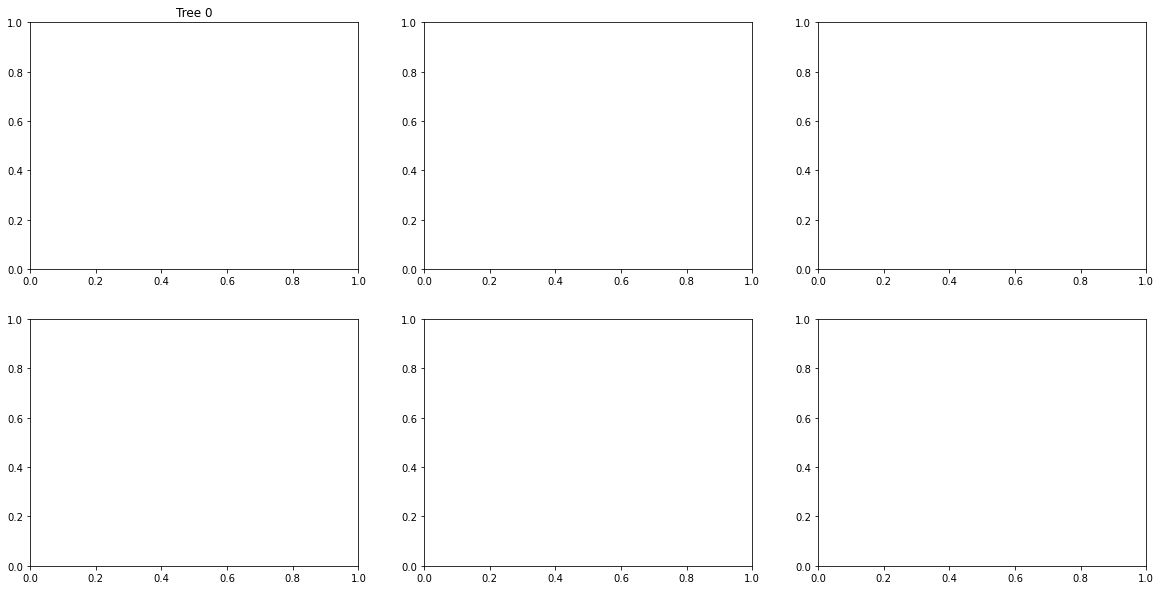

In [39]:
import mglearn

fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax=axes[-1, -1], alpgha = .4)

axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [52]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
#print(accuracy_score(y_test, y_pred))

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.982
Accuracy on test set: 0.947


In [20]:
y_pred = forest.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

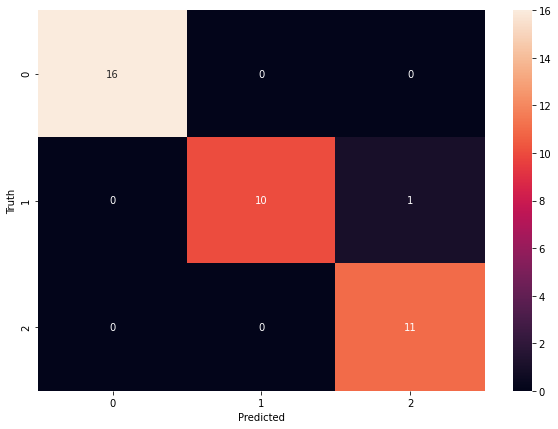

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')